<a href="https://colab.research.google.com/github/marcosmvgs/CEAAE---Ostensivo/blob/main/Lista_de_exerc%C3%ADcios_3_GE_803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LISTA DE EXERCÍCIOS 3

Data de entrega:
OBS: Para alguns exercícios será necessário utilizar uma linguagem de programação.

**1 –** Preencha a tabela apresentada a seguir usando o conceito de FOV e a transformação de ângulo
em radianos para graus.

| FOV (mrad) | d(m) | s(m)  |
|------------|------|-------|
| 100        | 300  | 30,03      |
| 845,7           | 3    | 2, 7  |
| 88         |   240,18   | 21,15 |


Tabela com a conversão da unidade do FOV de mrad para °:

| FOV (°C) | d(m) | s(m)  |
|------------|------|-------|
| 5,729        | 300  | 30,03      |
| 48,45           | 3    | 2, 7  |
| 5,04         |   240,18   | 21,15 |

**2 –** O helicóptero H36 Caracal tem como maior dimensão o seu comprimento, de 19,5 metros.
Supondo que um equipamento de medição de IR tem FOV circular de 100 mrad, a que distância deve ser colocado o equipamento para que o helicóptero esteja contido inteiramente em seu FOV? Se for considerada uma margem de segurança de 10% no comprimento do H36 (já que em uma medição operacional em campo o helicóptero não fica completamente imóvel), a que distância dever ser colocado o equipamento?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
s = 19.5 # Comprimento do helicoptero
FOV = 100 
s *= 1.1 # Comprimento adicionado da margem de segurança
d = s/(2*np.tan(100/2000)) # equação que resulta na distância necessária entre equipamento e aeronave
print(f'Para as condições do H36 dadas no exercício o equipamento deve ser colocado\na {round(d, 2)} metros do helicóptero, considerando 10% de segurança em relação ao comprimento da aeronave')

Para as condições do H36 dadas no exercício o equipamento deve ser colocado
a 214.32 metros do helicóptero, considerando 10% de segurança em relação ao comprimento da aeronave


In [ ]:
s = 11.338
s *=1.1
d = s/(2*np.tan(100/2000))
print(f'Para as condições do A29 o equipamento deve ser colocado\na {round(d, 2)} metros da aeronave, considerando 10% de segurança em relação ao comprimento da aeronave')

Para as condições do A29 o equipamento deve ser colocado
a 124.61 metros da aeronave, considerando 10% de segurança em relação ao comprimento da aeronave


---

**3 –** O ângulo linear  subentendido por um comprimento de arco s a partir da origem de um
círculo de raio r é definido como  $\theta$ = s/r. Se s é o cateto oposto do triângulo retângulo formado
com o lado r, tem-se que $s_1$ = 2tg($\theta$/2). Afirma-se que para ângulos de visada  pequenos
pode-se usar a definição $s$ = $\theta$r , ao invés do cálculo exato $s_1$. Usando o Matlab, plote a curva do erro efetuado ao usar-se essa aproximação para ângulos de 0,01 a 45° (use erro(%) = 100· valor_absoluto (– )/ )

In [ ]:
r = 1
angulos = np.arange(0.01, 45, 0.01)

def erro(angulos):
  s1 = 2*r*(np.tan((angulos/2)*(np.pi/180)))
  s = r*(angulos)*(np.pi/180)
  erro = 100*(abs(s-s1)/s1)
  return erro

erro = erro(angulos)

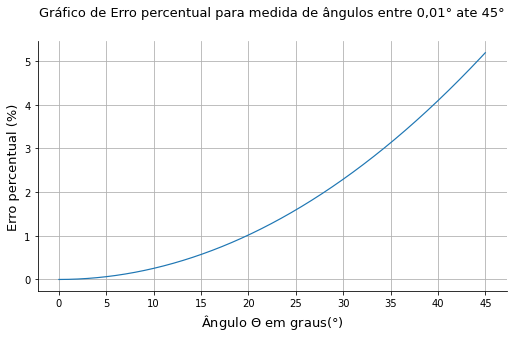

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))

ax.plot(angulos, erro, linewidth = 1.2)
plt.tight_layout()
plt.title('Gráfico de Erro percentual para medida de ângulos entre 0,01° ate 45°',
          pad = 25,
          fontsize = 13)
plt.xticks(np.arange(0, 50, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Erro percentual (%)', fontsize = 13)
ax.set_xlabel('Ângulo $\Theta$ em graus(°)', fontsize = 13)
plt.grid()
plt.show()


---

**4 –** Considerando a geometria a seguir, complete a tabela.


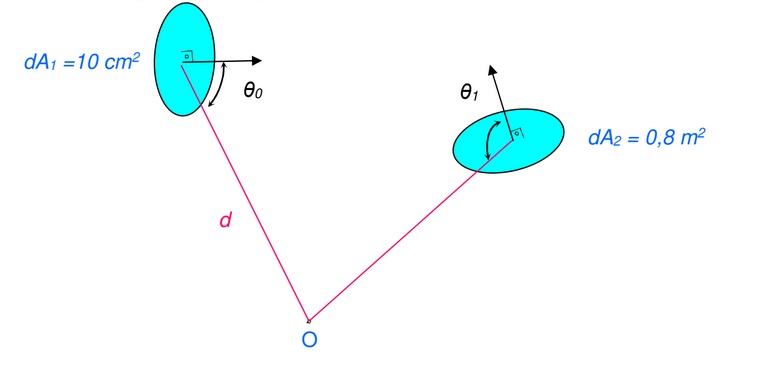

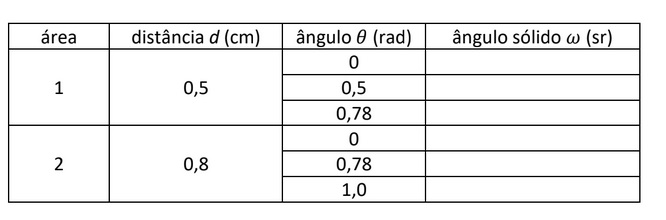

**Resposta**

Tabela preenchida abaixo considerando as distâncias em metros

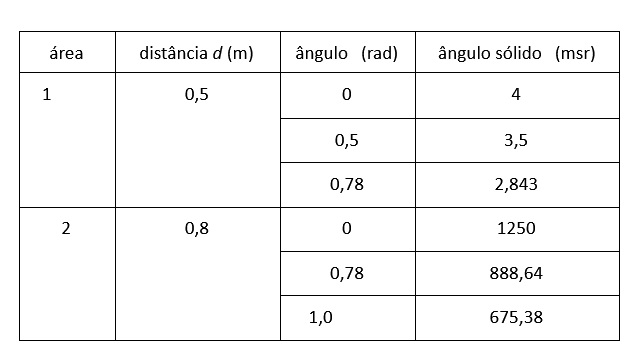

**5 –** Calcule os valores da curva de Planck para T = 1000 K. Utilize como vetor de comprimentos de
onda λ os valores, em micrometros: 0.01, 0.02, 0.03, ... , 50. Faça um gráfico da exitância espectral,
com λ no eixo , e insira como título o valor da integral da curva de Planck (, T), ou seja,

In [ ]:
def M_spectral(T, comp_onda):
    
    '''
    (float, float/list) -> float/list
    Recebe temperatura em K e comprimento de onda em micrometro e retorna Exitancia espectal em W/m2*microm
    '''
    c1 = 3.74177107 * 10**8 #Constante C1, em W.um^2
    c2 = 14387.752 #Constante C2, em um.K
    n = 1 #indice de refracao
    
    #Calculo do primeiro fator: c1/(n^2.lambda^5)
    fator1 = c1/((n**2)*(comp_onda**5))
    
    #Calculo do denominador do 2o fator
    fator2 = np.exp(c2/(n*comp_onda*T))-1
    
    M = fator1 / fator2 # %W/(m^2.um)
    
    return M

In [ ]:
T = 1000
comp_onda = np.arange(0.01, 50, 0.01)
m1 = M_spectral(T, comp_onda)

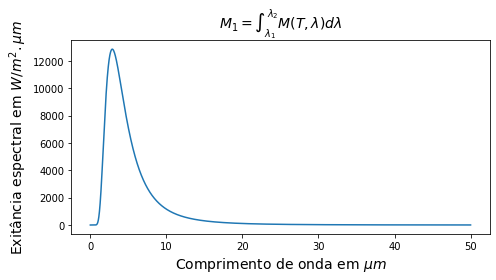

In [ ]:
fig2, ax2 = plt.subplots(figsize = (7, 4))

ax2.plot(comp_onda, m1)
ax2.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 14)
ax2.set_xlabel('Comprimento de onda em $\mu m$', fontsize = 14)
plt.title('$M_{1} = \int_{\lambda _{1}}^{\lambda_{2}} M(T, {\lambda} )d{\lambda}$', fontsize = 14)
plt.tight_layout()
plt.show()

Faça o cálculo da exitância total emitida, , pela equação de Stephan-Boltzmann. Qual a relação
entre os valores  e ?

In [ ]:
const = 5.67*10**(-8)
stefan = const*(T**(4))
m2 = stefan
print(f'A exitância total emitida pela Lei de Stefan Boltzman é de {round(m2)}W/m²')

A exitância total emitida pela Lei de Stefan Boltzman é de 56700W/m²


In [ ]:
integral = round(np.trapz(m1, comp_onda), 6)
print(f'A exitância total emitida fazendo a integração da curva de Planck é de {round(integral, 2)}W/m²')
erro = 100*(abs(m2-integral)/integral)
print(erro)

A exitância total emitida fazendo a integração da curva de Planck é de 56641.81W/m²
0.1027394509044862


De acordo com os resultados acima podemos verificar que a relação entre $M_{1}$ e $M_{2}$ resultou em um erro de aproximadamente 0.102%

---

**6 –** Calcule os valores da curva de Planck para T = 2000 K. Utilize como vetor de comprimentos de
onda λ valores de 0,8 a 6,0 μm, contendo pelo menos 500 valores igualmente espaçados. Verifique
o máximo da função para apontar exatamente qual o comprimento de onda onde ocorre o
máximo da função. O resultado é próximo ao esperado pela lei de Wien?

In [ ]:
T = 2000
comp_onda = np.linspace(0.8, 6, 500)
exit_espec = M_spectral(T, comp_onda)

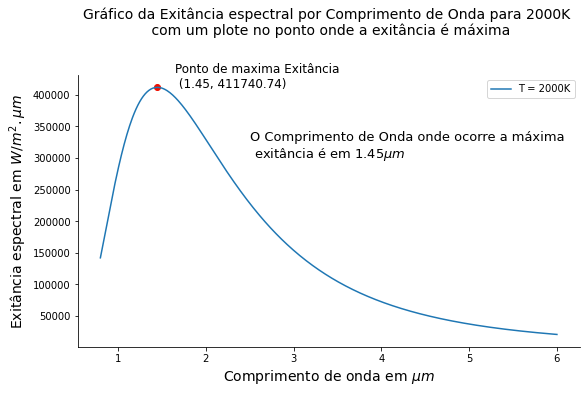

In [ ]:
fig3, ax3 = plt.subplots(figsize = (9,5))

ax3.plot(comp_onda, exit_espec, linewidth = 1.5, label = 'T = 2000K')
for i in range(0, len(exit_espec)):
  if exit_espec[i] == max(exit_espec):
    comp_onda_max = comp_onda[i]
ax3.scatter(comp_onda_max, max(exit_espec), color = '#F00F00')
ax3.annotate(f'Ponto de maxima Exitância  \n {round(comp_onda_max, 2),round(max(exit_espec), 2)}', xy=(comp_onda_max+0.2, max(exit_espec)),
             fontsize = 12)
ax3.annotate(f'O Comprimento de Onda onde ocorre a máxima \n exitância é em {round(comp_onda_max, 2)}$\mu m$', xy=(2.5,300000),
             fontsize = 13)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 14)
ax3.set_xlabel('Comprimento de onda em $\mu m$', fontsize = 14)
plt.title('Gráfico da Exitância espectral por Comprimento de Onda para 2000K \n com um plote no ponto onde a exitância é máxima', pad = 40, fontsize= 14)
plt.legend()

plt.show()